In [1]:
%pylab inline
import numpy as np

import scipy.spatial

Populating the interactive namespace from numpy and matplotlib


# Affine Set

line이 $ x_1, x_2$을 지나갈때.. 여기에 속하는 모든 points. 

$$ \text{point} = \theta x_1 + (1-\theta)x_2 , \ \theta \in \textbf{R} $$


예를 들어서 (2, 3) 에서 (4, 5)를 지나가는 선이 있고, 이 선위의 점을 찾으려면 Affine Set을 구하면 됩니다. <br>
0에 가까울수록 두번째 point에 가깝고, 1에 가까울수록 첫번째 point에 가깝습니다.

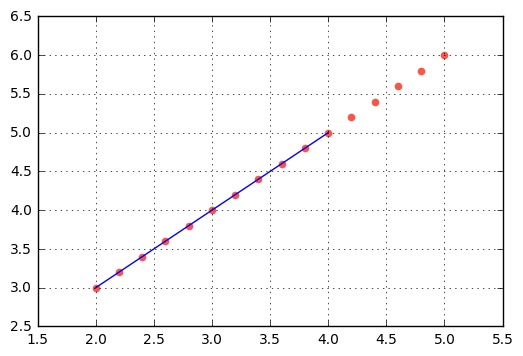

In [2]:
def affine(a, b, theta=0.2):
    return theta * a + (1-theta)* b

a = np.array([2, 3])
b = np.array([4, 5])


affine_points = [affine(a, b, theta) for theta in np.arange(-0.5, 1.1, 0.1)]
x, y = [x for x in zip(*affine_points)]

plot(*[x for x in  zip(a, b)])
scatter(x, y, color='#ff5345')
grid()

# Convex Set

$$ \text{point} =  \theta x_1 + (1-\theta) x_2 $$

위의 공식에서 $ 0 \le \theta \le 1 $ 조건을 갖으며, point는 set 안의 어떠한 점들 사이의 선이 모두 해당 set안에 포함되어야 convex set입니다.

<img src="./images/convex-set.jpg">

# Convex Combination

vector space안의 any points $ x_1, x_2, ... x_k $가 다음의 형태를 취할때 convex combination입니다.<br>
이때 $ \theta_i \ge 0 $ 이며, $ \theta_1 + \theta_2 + ... + \theta_k = 1 $ 입니다.

$$ x = \theta_1 x_1 + \theta_2 x_2 + ... + \theta_k x_k $$ 

### Example 

예를 들어서 points $ P_0, P_1 $ 이 있고, 2점 사이의 any point $ P $는 다음과 같이 나타낼수 있습니다. 

$$ P = \theta P_0 + (1-\theta)P_1 $$

위의 공식은 다음과 같습니다. 

$$ P = \alpha_0 P_0 + \alpha_1 P_1$$

즉 affine combination이며 이때 $ \alpha_0 + \alpha_1 = 1 $ 이라면 convex combination 입니다. 

# Convex Hull 

convex hull이란 어떤 point의 조합 (convex combination)이 되든지 해당 subset을 포함하는 가장작은 convex set을 말합니다. 

<img src="./images/convex-hull.png">

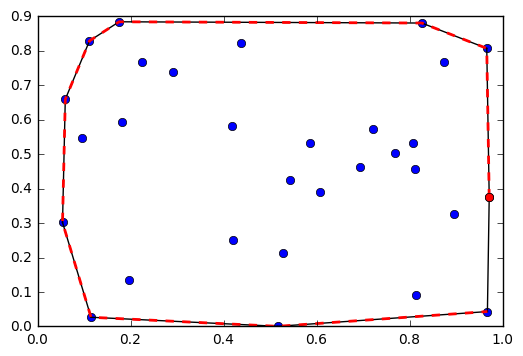

In [6]:
from scipy.spatial import ConvexHull
points = np.random.rand(30, 2)   # 30 random points in 2-D
hull = ConvexHull(points)

plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plot(points[simplex, 0], points[simplex, 1], 'k-')
    
plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')

### References

* http://www-personal.umich.edu/~mepelman/teaching/IOE611/Handouts/Sets.pdf